# Feature Engineering and Selection

## Imports

In [67]:
import pandas as pd 
from matplotlib import pyplot as plt 
from sklearn.linear_model import LinearRegression 
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Lasso
from sklearn.tree import DecisionTreeRegressor 
from sklearn.model_selection import GridSearchCV  
from sklearn.ensemble import GradientBoostingRegressor

## Import the clean data set

In [22]:
df = pd.read_csv('./Clean_Insurance_Data.csv', decimal='.', delimiter=',')
df.head()

,index,PatientID,age,gender,bmi,bloodpressure,diabetic,children,smoker,region,claim
0,0,1,39.0,male,23.2,91.0,Yes,0,No,southeast,1121.87
1,1,2,24.0,male,30.1,87.0,No,0,No,southeast,1131.51
2,2,3,38.0,male,33.3,82.0,Yes,0,No,southeast,1135.94
3,3,4,38.0,male,33.7,80.0,No,0,No,northwest,1136.40
4,4,5,38.0,male,34.1,100.0,No,0,No,northwest,1137.01


## Drop irrelevant features

In [23]:
df = df.drop(['PatientID', 'index'], axis=1) 

# Feature Creation
Feature engineering is crucial for machine learning models. Here, one-hot encoding is applied to the *diabetic*, *smoker*, *region*, and *gender* columns, transforming categorical data into a binary format suitable for model input.

In [24]:
df['diabetic'] = df['diabetic'].map({'Yes': 1, 'No': 0})  
df['gender'] = df['gender'].map({'male': 1, 'female': 0}) 
df['smoker'] = df['smoker'].map({'No': 0, 'Yes': 1})
df['region'] = df['region'].map({'northwest': 0, 'northeast': 1, 'southwest': 2, 'southeast': 3})

# convert the bloodpressure column to int for future use 
df['bloodpressure'] = df['bloodpressure'].astype(int)
df.head()

,age,gender,bmi,bloodpressure,diabetic,children,smoker,region,claim
0,39.0,1,23.2,91,1,0,0,3,1121.87
1,24.0,1,30.1,87,0,0,0,3,1131.51
2,38.0,1,33.3,82,1,0,0,3,1135.94
3,38.0,1,33.7,80,0,0,0,0,1136.40
4,38.0,1,34.1,100,0,0,0,0,1137.01


Save the new data set to a CSV file for use in the next notebook.

In [25]:
df.to_csv('./Feature_Engineered_Insurance_Data.csv', index=False)

# Feature selection
Feature selection is a process where we aim to choose those attributes of the data that contribute most significantly to our prediction variable or output in which we are interested. The benefits of feature selection include simplification of models, faster training times, and avoidance of the curse of dimensionality.

#### Feature selection using a correlation matrix

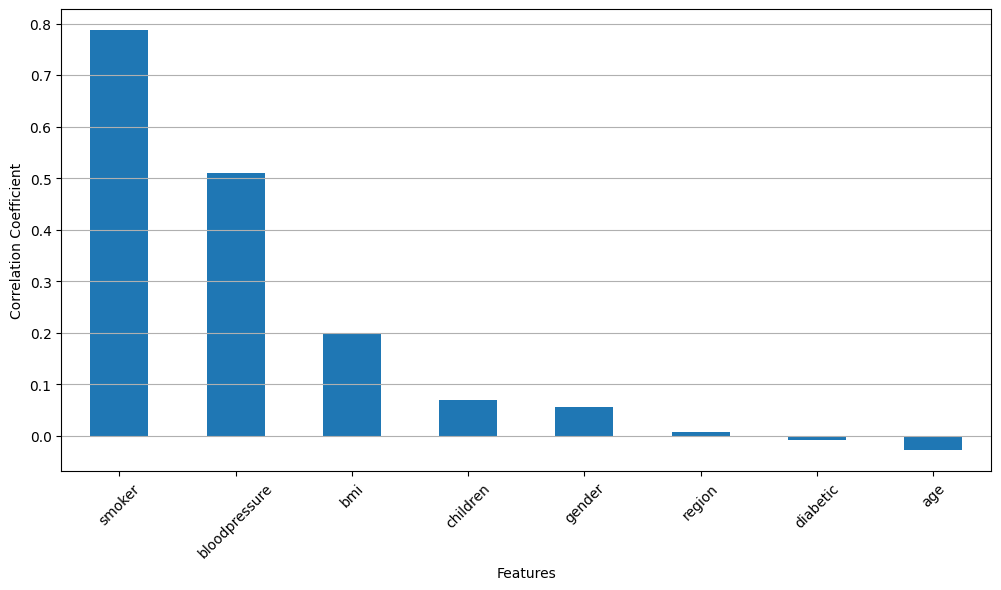

In [26]:
correlation_matrix = df.corr()
correlation = correlation_matrix['claim'].sort_values(ascending=False)
plt.figure(figsize=(12, 6))
correlation.drop('claim').plot(kind='bar')
plt.xlabel('Features')
plt.ylabel('Correlation Coefficient')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.show()  

In [27]:
correlation

claim            1.000000
smoker           0.787279
bloodpressure    0.510093
bmi              0.198050
children         0.069233
gender           0.055766
region           0.007316
diabetic        -0.008725
age             -0.027830
Name: claim, dtype: float64

1. *Smoker, 0.79*: High correlation 
2. *bloodpressure, 0.51*: Moderate correlation

**Important Note:** Correlation does not imply causation. High correlation means there is a linear relationship, but it doesn’t necessarily mean that one feature causes the other to change.

## Variance

Variance analysis helps in understanding the spread of the data. It is crucial for identifying features with high variance, which are often more informative for models.

- High variance in continuous variables like claim or age suggests a wide range of these features in your dataset, which can be significant for understanding the dataset's diversity.
- For binary variables like gender, diabetic, and smoker, the variance can give you an idea about the distribution balance between the two categories.

In [28]:
df.var()

age              1.228146e+02
gender           2.501510e-01
bmi              3.680186e+01
bloodpressure    9.673706e+01
diabetic         2.497498e-01
children         1.452830e+00
smoker           1.627880e-01
region           1.418151e+00
claim            1.466426e+08
dtype: float64

## Split the data into train and testing sets 

In [29]:
X = df.drop('claim', axis=1)
y = df['claim'] 

# splitting the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

## Linear Regression

The most extensively used modelling technique is linear regression, which assumes a linear connection between a dependent variable (Y) and an independent variable (X). It employs a regression line, also known as a best-fit line. The linear connection is defined as *Y = c+m*X + e*, where ‘c’ denotes the intercept, ‘m’ denotes the slope of the line, and ‘e’ is the error term.

### Train

In [35]:
lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)

LinearRegression()

### Evaluate

In [36]:
val_pred = lin_reg.predict(X_test)
mse = mean_squared_error(y_test, val_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, val_pred)

print(f"Mean Squared Error: {mse}")
print(f"Root Mean Squared Error: {rmse}")
print(f"R-squared Score: {r2}")

Mean Squared Error: 43457521.15925705
Root Mean Squared Error: 6592.2318799672885
R-squared Score: 0.7269313256188532


### Visualize

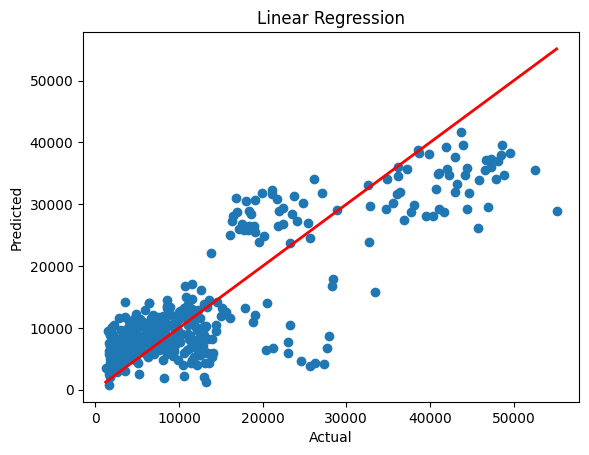

In [38]:
plt.scatter(y_test, val_pred)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r-', lw=2)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Linear Regression')
plt.show()

## Lasso Regression

LASSO regression, also known as L1 regularization, is a popular technique used in statistical modeling and machine learning to estimate the relationships between variables and make predictions. LASSO stands for *Least Absolute Shrinkage and Selection Operator*.

### Train

In [58]:
lasso_reg = Lasso(alpha=0.5)
lasso_reg.fit(X_train,y_train)

Lasso(alpha=0.5)

### Evaluate

In [59]:
lasso_score = lasso_reg.score(X_test, y_test)
print(f"Lasso Regression Score: {lasso_score}")

Lasso Regression Score: 0.726920910734308


### Visualize

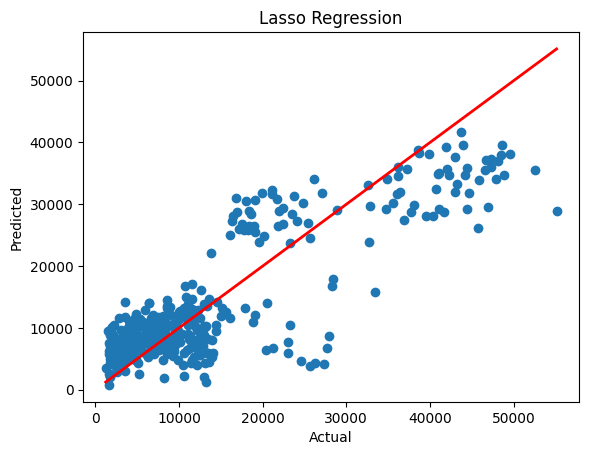

In [60]:
lasso_pred = lasso_reg.predict(X_test)

plt.scatter(y_test, lasso_pred)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r-', lw=2)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Lasso Regression')
plt.show()

## Decision Trees for regression

Decision tree builds regression or classification models in the form of a tree structure. It breaks down a dataset into smaller and smaller subsets while at the same time an associated decision tree is incrementally developed. The final result is a tree with decision nodes and leaf nodes.

### Train

In [49]:
regressor = DecisionTreeRegressor(random_state = 0)   
regressor.fit(X, y) 

DecisionTreeRegressor(random_state=0)

### Evaluate

In [51]:
tree_val_pred = regressor.predict(X_test)
mse = mean_squared_error(y_test, tree_val_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, tree_val_pred)

print(f"Mean Squared Error: {mse}")
print(f"Root Mean Squared Error: {rmse}")
print(f"R-squared Score: {r2}")

Mean Squared Error: 0.0
Root Mean Squared Error: 0.0
R-squared Score: 1.0


### Visualize 

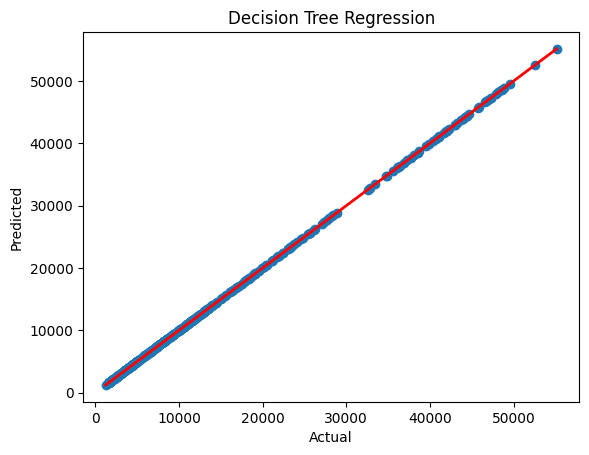

In [53]:
plt.scatter(y_test, tree_val_pred)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r-', lw=2)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Decision Tree Regression')
plt.show()

# Hyperparameter tuning

Hyperparameter tuning is a process in the field of machine learning that involves adjusting the parameters of a model to improve its performance. Unlike model parameters, which are learned from the training data, hyperparameters are set prior to the training process and govern the training process itself. The goal of hyperparameter tuning is to find the optimal combination of hyperparameters that yields the best performance of a model according to a predefined metric, such as accuracy or precision. 

We're going to use techniques like Grid Search to systematically explore different combinations of parameters in search of the most effective model.

## Using Gradient Boosting Regressor as a Machine Learning model to use GridSearchCV

In [63]:
gbr = GradientBoostingRegressor()

## Define the parameter grid 

Set up a dictionary where keys are the hyperparameters, and values are lists of settings to try. For Logistic Regression, common hyperparameters to tune are *C* (inverse of regularization strength) and *solver*.

In [64]:
parameters = {'learning_rate': [0.01,0.02,0.03,0.04],
              'subsample'    : [0.9, 0.5, 0.2, 0.1],
              'n_estimators' : [100,500,1000, 1500],
              'max_depth'    : [4,6,8,10]
             }

## Training the model

- estimator: In this we have to pass the models or functions on which we want to use GridSearchCV
- param_grid: Dictionary or list of parameters of models or function in which GridSearchCV have to select the best.
- Scoring: It is used as a evaluating metric for the model performance to decide the best hyperparameters, if not especified then it uses estimator score.
- cv : In this we have to pass a interger value, as it signifies the number of splits that is needed for cross validation. By default is set as five.
- n_jobs : This signifies the number of jobs to be run in parallel, -1 signifies to use all processor.

In [65]:
grid_GBR = GridSearchCV(estimator=gbr, param_grid = parameters, cv = 2, n_jobs=-1)
grid_GBR.fit(X_train, y_train)

GridSearchCV(cv=2, estimator=GradientBoostingRegressor(), n_jobs=-1,
             param_grid={'learning_rate': [0.01, 0.02, 0.03, 0.04],
                         'max_depth': [4, 6, 8, 10],
                         'n_estimators': [100, 500, 1000, 1500],
                         'subsample': [0.9, 0.5, 0.2, 0.1]})

## Review the Best Parameters and Model

In [66]:
print(" Results from Grid Search " )
print("\n The best estimator across ALL searched params:\n",grid_GBR.best_estimator_)
print("\n The best score across ALL searched params:\n",grid_GBR.best_score_)
print("\n The best parameters across ALL searched params:\n",grid_GBR.best_params_)

 Results from Grid Search 

 The best estimator across ALL searched params:
 GradientBoostingRegressor(learning_rate=0.03, max_depth=4, subsample=0.5)

 The best score across ALL searched params:
 0.7730949808107891

 The best parameters across ALL searched params:
 {'learning_rate': 0.03, 'max_depth': 4, 'n_estimators': 100, 'subsample': 0.5}


## Evaluate the tuned model



In [68]:
gbr_val_pred = grid_GBR.predict(X_test)
mse = mean_squared_error(y_test, gbr_val_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, gbr_val_pred)
mae = mean_absolute_error(y_test, gbr_val_pred)

print(f"Mean Squared Error: {mse}")
print(f"Root Mean Squared Error: {rmse}")
print(f"R-squared Score: {r2}")
print(f"Mean Absolute Error: {mae}")

Mean Squared Error: 26808181.29605482
Root Mean Squared Error: 5177.661759525705
R-squared Score: 0.8315487323297596
Mean Absolute Error: 3913.912289345539
